In [1]:
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('Cleaned_Data/historical_2016_cleaned.csv')
df.head()

,Year/Month,Date,Year,Month,Zip Code,City,State,Median Listing Price,Average Listing Price,Active Listing Count,Median Days on Market,New Listing Count,Price Increased Count,Price Reduced Count,Pending Listing Count,Median Price per Square Foot (List Price),Median Square Feet,Total Listing Count,Pending Ratio
0,202104,2021-04-01,2021,April,28213,charlotte,nc,280117.5,285710.02,16,11.0,36,0,0,28,138.05,"2,109.0",44,1.750000
1,202104,2021-04-01,2021,April,28262,charlotte,nc,370700.0,337630.05,13,12.5,12,0,0,26,162.75,"2,262.0",39,2.000000
2,202104,2021-04-01,2021,April,28207,charlotte,nc,1299250.0,1530404.68,52,90.5,20,0,12,45,447.01,"2,740.5",97,0.865385
3,202104,2021-04-01,2021,April,28202,charlotte,nc,409950.0,559791.09,85,48.0,28,0,20,41,343.04,"1,221.5",126,0.482353
4,202104,2021-04-01,2021,April,28226,charlotte,nc,630517.5,949039.63,52,38.5,48,4,16,78,231.56,"2,870.0",130,1.500000


In [3]:
df = df[["Year/Month", "Zip Code", "Average Listing Price"]]
df.head()

,Year/Month,Zip Code,Average Listing Price
0,202104,28213,285710.02
1,202104,28262,337630.05
2,202104,28207,1530404.68
3,202104,28202,559791.09
4,202104,28226,949039.63


In [4]:
# 28207, 28226, 28278, 28213

In [5]:
# filter new dataframe to include only certain zipcode
df_28207 = df.loc[df["Zip Code"] == 28207]
df_28226 = df.loc[df["Zip Code"] == 28226]
df_28278 = df.loc[df["Zip Code"] == 28278]
df_28213 = df.loc[df["Zip Code"] == 28213]

In [6]:
df_28213

,Year/Month,Zip Code,Average Listing Price
0,202104,28213,285710.02
36,202103,28213,256458.00
47,202102,28213,186529.05
112,202011,28213,234978.56
149,202010,28213,239281.32
164,202009,28213,235407.76
199,202008,28213,228937.00
204,202007,28213,238605.90
227,202006,28213,239827.49
267,202005,28213,233547.07


In [7]:
df_28278.dtypes

Year/Month                 int64
Zip Code                   int64
Average Listing Price    float64
dtype: object

In [8]:
# Assign the data to X and y
X = df_28213["Year/Month"].values.reshape(-1, 1)
y = df_28213["Average Listing Price"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (56, 1) (56, 1)


array([[202104],
       [202103],
       [202102],
       [202011],
       [202010],
       [202009],
       [202008],
       [202007],
       [202006],
       [202005],
       [202004],
       [202003],
       [202002],
       [202001],
       [201912],
       [201911],
       [201910],
       [201909],
       [201908],
       [201907],
       [201906],
       [201905],
       [201904],
       [201903],
       [201902],
       [201901],
       [201812],
       [201811],
       [201810],
       [201809],
       [201808],
       [201807],
       [201806],
       [201805],
       [201804],
       [201803],
       [201802],
       [201801],
       [201712],
       [201711],
       [201710],
       [201709],
       [201708],
       [201707],
       [201706],
       [201705],
       [201704],
       [201703],
       [201702],
       [201701],
       [201612],
       [201611],
       [201610],
       [201609],
       [201608],
       [201607]])

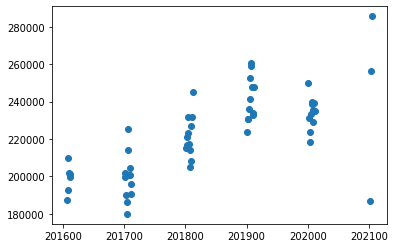

In [9]:
# Plot the data

plt.scatter(X, y)

In [10]:
# Create the model and fit the model to the data

model = LinearRegression()
model

LinearRegression()

In [11]:
# Fit the model to the data. 

model.fit(X,y)

LinearRegression()

In [12]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[201607]]
Max X Value: [[202104]]


In [13]:
X

array([[202104],
       [202103],
       [202102],
       [202011],
       [202010],
       [202009],
       [202008],
       [202007],
       [202006],
       [202005],
       [202004],
       [202003],
       [202002],
       [202001],
       [201912],
       [201911],
       [201910],
       [201909],
       [201908],
       [201907],
       [201906],
       [201905],
       [201904],
       [201903],
       [201902],
       [201901],
       [201812],
       [201811],
       [201810],
       [201809],
       [201808],
       [201807],
       [201806],
       [201805],
       [201804],
       [201803],
       [201802],
       [201801],
       [201712],
       [201711],
       [201710],
       [201709],
       [201708],
       [201707],
       [201706],
       [201705],
       [201704],
       [201703],
       [201702],
       [201701],
       [201612],
       [201611],
       [201610],
       [201609],
       [201608],
       [201607]])

In [14]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

print(y_min)
print(y_max)

[[196095.85954089]]
[[251457.401007]]


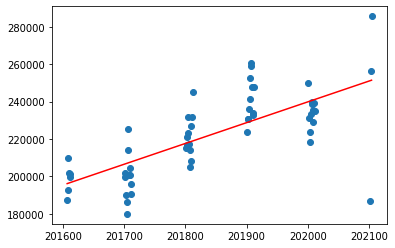

In [15]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X,y)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 251491073.39621797
R-squared (R2 ): 0.49450488327634934


In [17]:
# Use train_test_split to create training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
# Fit the model to the data. 

# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.4461574296826808
Testing Score: 0.47247708754473894


In [19]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[201607]]
Max X Value: [[202104]]


In [20]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

print(y_min)
print(y_max)

[[196043.64523303]]
[[246659.20732527]]


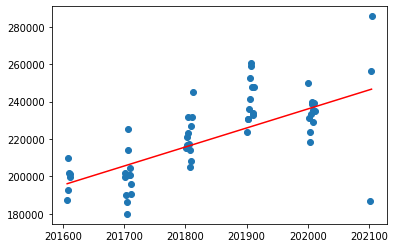

In [21]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X,y)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 258504936.68696812
R-squared (R2 ): 0.4804070721892111


In [23]:
# Overall Score for the model
model.score(X, y)

0.4804070721892111

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Score the model using the testing data
model.score(X_test, y_test)

0.47247708754473894

In [27]:
Xnew = [[202201], [202301], [202401], [202501], [203001], [204001], [205001], [206001], [207001]]
ynew = model.predict(Xnew)

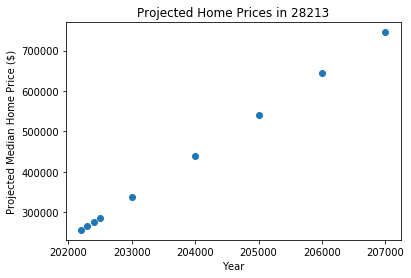

In [30]:
plt.scatter(Xnew,ynew)
plt.xlabel("Year")
plt.ylabel("Projected Median Home Price ($)")
plt.title("Projected Home Prices in 28213")
plt.savefig("Images/Projected_Prices_28213.png")